# Visualizing Active Recovery Protocol Text Data

Active Recovery Protocols:

* Breathwork
* Cryotherapy
* Exercise
* Heat Therapy
* Nature Immersion
* Sleeping

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import altair as alt
import pandas as pd

In [3]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# 1. How Related Are these Active Recovery Protocols? 

Let's create an embedding representation for each protocol, calculate a similarity matrix, and then make a heatmap to see how much they overlap!

## Analysis

### Embeddings

First, I need each active protocol to be its own document.

In [4]:
def read_text_files(file_dict):
    data = {}
    for var_name, file_path in file_dict.items():
        with open(file_path, "r", encoding="utf-8") as f:
            data[var_name] = f.read().lower()
    return data

# Example usage:
breathwork_file_dict = {
    "breathwork_overview_raw": "data/raw/breathwork/overview.txt",
    "breathwork_execution_raw": "data/raw/breathwork/execution.txt",
    "breathwork_benefits_raw": "data/raw/breathwork/benefits.txt"
}

cryotherapy_file_dict = {
    "cryotherapy_overview_raw": "data/raw/cryotherapy/overview.txt",
    "cryotherapy_execution_raw": "data/raw/cryotherapy/execution.txt",
    "cryotherapy_benefits_raw": "data/raw/cryotherapy/benefits.txt"
}

heat_therapy_file_dict = {
    "heat_therapy_overview_raw": "data/raw/heat_therapy/overview.txt",
    "heat_therapy_execution_raw": "data/raw/heat_therapy/execution.txt",
    "heat_therapy_benefits_raw": "data/raw/heat_therapy/benefits.txt"
}

exercise_file_dict = {
    "exercise_overview_raw": "data/raw/exercise/overview.txt",
    "exercise_execution_raw": "data/raw/exercise/execution.txt",
    "exercise_benefits_raw": "data/raw/exercise/benefits.txt"
}

nature_file_dict = {
    "nature_overview_raw": "data/raw/nature/overview.txt",
    "nature_execution_raw": "data/raw/nature/execution.txt",
    "nature_benefits_raw": "data/raw/nature/benefits.txt"
}

sleep_file_dict = {
    "sleep_overview_raw": "data/raw/sleep/overview.txt",
    "sleep_execution_raw": "data/raw/sleep/execution.txt",
    "sleep_benefits_raw": "data/raw/sleep/benefits.txt"
}

breathwork_text_data = read_text_files(breathwork_file_dict)
cryotherapy_text_data = read_text_files(cryotherapy_file_dict)
heat_therapy_text_data = read_text_files(heat_therapy_file_dict)
exercise_text_data = read_text_files(exercise_file_dict)
nature_text_data = read_text_files(nature_file_dict)
sleep_text_data = read_text_files(sleep_file_dict)

In [5]:
# Load a pretrained model (e.g., 'all-MiniLM-L6-v2' is lightweight and effective)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Your documents (replace with your actual text)
documents = [
    breathwork_text_data["breathwork_overview_raw"] + " " + breathwork_text_data["breathwork_execution_raw"] + " " + breathwork_text_data["breathwork_benefits_raw"],
    cryotherapy_text_data["cryotherapy_overview_raw"] + " " + cryotherapy_text_data["cryotherapy_execution_raw"] + " " + cryotherapy_text_data["cryotherapy_benefits_raw"],
    heat_therapy_text_data["heat_therapy_overview_raw"] + " " + heat_therapy_text_data["heat_therapy_execution_raw"] + " " + heat_therapy_text_data["heat_therapy_benefits_raw"],
    exercise_text_data["exercise_overview_raw"] + " " + exercise_text_data["exercise_execution_raw"] + " " + exercise_text_data["exercise_benefits_raw"],
    nature_text_data["nature_overview_raw"] + " " + nature_text_data["nature_execution_raw"] + " " + nature_text_data["nature_benefits_raw"],
    sleep_text_data["sleep_overview_raw"] + " " + sleep_text_data["sleep_execution_raw"] + " " + sleep_text_data["sleep_benefits_raw"]
]

# Generate embeddings
embeddings = model.encode(documents, convert_to_tensor=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Let's take a look at one of the embeddings!

In [6]:
embeddings[0].shape

torch.Size([384])

In [7]:
embeddings[0][0:10]

tensor([-0.0725,  0.0533, -0.0570,  0.0121, -0.0242, -0.0174, -0.0125, -0.0458,
        -0.0315,  0.0271])

### Similarity Matrix

In [8]:
# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings)

print("Similarity Matrix:")
print(similarity_matrix)

Similarity Matrix:
[[1.0000002  0.35337472 0.55132973 0.5183076  0.53135264 0.5063235 ]
 [0.35337472 1.0000004  0.6192724  0.50839937 0.37734425 0.3363817 ]
 [0.55132973 0.6192724  1.         0.5834539  0.59140074 0.5238651 ]
 [0.5183076  0.50839937 0.5834539  0.99999994 0.6421325  0.63790226]
 [0.53135264 0.37734425 0.59140074 0.6421325  1.0000002  0.60041714]
 [0.5063235  0.3363817  0.5238651  0.63790226 0.60041714 0.9999996 ]]


## Visualization

### Heatmap

In [9]:
labels = ["breathwork", "cryotherapy", "heat_therapy", "exercise", "nature", "sleep"]

# Convert matrix to long-form DataFrame
rows = []
for i in range(similarity_matrix.shape[0]):
    for j in range(similarity_matrix.shape[1]):
        rows.append({
            'x': labels[j],
            'y': labels[i],
            'value': similarity_matrix[i, j],
            'row_idx': i,
            'col_idx': j
        })
df = pd.DataFrame(rows)

# Filter to show only lower triangle (including diagonal)
df_half = df[df['row_idx'] >= df['col_idx']]

# Create the half heatmap
heatmap = alt.Chart(df_half).mark_rect().encode(
    x=alt.X('x:O', title='', sort=labels),
    y=alt.Y('y:O', title='', sort=labels),
    color=alt.Color('value:Q', 
                   scale=alt.Scale(scheme='oranges', domain=[0, 1]),
                   legend=alt.Legend(title='Similarity')),
    tooltip=['x', 'y', 'value']
).properties(
    title='Active Recovery Protocol Similarity Heatmap',
    width=300,
    height=300
)

# Add text labels
text = heatmap.mark_text(baseline='middle').encode(
    text=alt.Text('value:Q', format='.2f'),
    color=alt.condition(
        alt.datum.value > 0.5,
        alt.value('black'),
        alt.value('white')
    )
)

# Combine and make interactive
interactive_half_heatmap = (heatmap + text).interactive()
interactive_half_heatmap

alt.LayerChart(...)

Based on these results, we can immediately see that cryotherapy is the most unique from the rest.

We can also see that exercise is very similar to nature-based recovery and sleeping.

What is fascinating is that cryotherapy and heat therapy are the most similar with each other compared to the other protocols.

Here are the most related pairings:

* cryotherapy <-> heat therapy
* exercise <-> sleep 
* nature <-> exercise

Breakthwork is the loser, not having any strongest similarity with any other protocol:

* breathwork -> heat therapy

Heatmaps still take a good amount of brainpower to read. Would a chordmap be better? 

In [140]:
def matrix_to_plotly_format_nodup(matrix, labels):
    sources, targets, values = [], [], []
    n = len(matrix)
    for i in range(n):
        for j in range(n):
            if i < j and matrix[i, j] > 0:  # Only one direction, no self-links
                sources.append(i)
                targets.append(j)
                values.append(matrix[i, j]*100)
    return sources, targets, values, labels

sources, targets, values, labels = matrix_to_plotly_format_nodup(similarity_matrix, labels)
chord_df = pd.DataFrame({
    'source': sources,
    'target': targets,
    'value': values
})
chord_df['value'] = chord_df['value'].astype(int)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
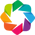

:Chord   [source,target]   (value)

In [143]:
import holoviews as hv
from holoviews import opts, dim
hv.extension('bokeh')
hv.output(size=200)
#add node labels
nodes = hv.Dataset(pd.DataFrame({'name': labels}), 'index')#create chord object
chord = hv.Chord((chord_df, nodes))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(),
               labels='name', node_color=dim('index').str()))

chord

# 2. What are the Benefits and How Do They Compare?

The main benefits of active recovery can be broadly summarized into 5 categories:

1. Physiological Repair
2. Nervous system balancing
3. Neuromuscular function
4. Cognitive and emotional resilience
5. Long term metabolic and cellular resistance

I essentially want a final table that looks like this:


| Active Recovery Protocol | Physiological Repair | Nervous System Balancing | Neuromuscular Function | Cognitive and Emotional Resilience | Long-Term Metabolic and Cellular Resistance |
|-------------------------|----------------------|--------------------------|-------------------------|------------------------------------|--------------------------------------------|
| Breathwork              | 1                    | 2                        | 1                       | 2                                  | 1                                          |
| Cryotherapy             | 4                    | 1                        | 3                       | 1                                  | 5                                          |
| Exercise                   | 3                    | 5                        | 4                       | 5                                  | 2                                          |
| Heat Therapy                   | 5                    | 3                        | 2                       | 3                                  | 4                                          |
| Nature                 | 2                    | 4                        | 5                       | 4                                  | 3                                          |
| Sleep           | 5                    | 5                        | 5                       | 5                                  | 5                                          |

I expect sleep to have the highest scores, and I expect breathwork to have the weakest scores. 

I expect nature and exercise to be pretty similar, but exercise will be higher overall.

**Now, how do I turn the text data into a table like above?**

I need some way to transform the intensity of the words to a score. For example, 'sleep strongly improves muscle repair' would have a higher score than 'breathwork mildly increases muscle repair.' 

There's a few different ways to approach this (such as creating a dictionary of words and assigning them a score), but I realized that someone probably already built a pre-trained model that can help measure this. Something like a sentiment analysis scoring model. 

After more research, I found the [VADER](https://ojs.aaai.org/index.php/ICWSM/article/view/14550) (Valence Aware Dictionary and sEntiment Reasoner) model. What the researchers did was get a ton of human raters to build a curated sentiment intensity dictionary. For example, love is +3 and hate is -3. Additionally, they added some features to account for adjectives such as 'kind of' or 'extremely'. Lastly, they add additional rules to handle punctuation, captilization, and degree modifiers. If a word is in all caps, it has a stronger sentiment. From there, it's just a matter of adding up scores!

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
# analyzer.lexicon.update({
#     "DOMS": -2.0,  # "Delayed Onset Muscle Soreness" = negative
#     "recovery": 1.5,
#     "biohack": 1.3,
# }) # if i need custom terms, I can update the lexicon like this

text = "Sleep strongly enhances muscle recovery and decreases risk of death."
print(analyzer.polarity_scores(text))

{'neg': 0.397, 'neu': 0.464, 'pos': 0.139, 'compound': -0.5994}


Grab each benefit from the text data.

In [15]:
import re

# Extract the text between "1." and "2." from cryotherapy_benefits_raw
match = re.search(r'1\..*?(2\.|$)', cryotherapy_text_data["cryotherapy_benefits_raw"], re.DOTALL)
cryotherapy_benefit1 = match.group(0) if match else ""
print(cryotherapy_benefit1)

1. physiological repair**  
### **key benefits:**  
✅ **reduces inflammation & muscle damage**  
   - cold exposure constricts blood vessels (**vasoconstriction**), decreasing inflammatory cytokines (il-6, tnf-α) post-exercise (schleip & klingler, 2019).  
   - lowers **creatine kinase (ck)** levels, a marker of muscle damage (bleakley et al., 2012).  

✅ **speeds up recovery (doms reduction)**  
   - meta-analyses show **~20-30% reduction in delayed-onset muscle soreness (doms)** (leeder et al., 2012).  
   - enhances **glycogen resynthesis** (important for endurance athletes).  

✅ **improves circulation (hormetic effect)**  
   - after cold exposure, blood vessels dilate (**vasodilation**), increasing oxygen/nutrient delivery to muscles.  
   - may **stimulate mitochondrial biogenesis** (long-term repair adaptation).  

---

## **2.


In [28]:
def extract_benefit(text, benefit_number):
    """
    Extracts the text between the specified benefit number and the next one.
    
    Args:
    - text (str): The raw text containing benefits.
    - benefit_number (int): The number of the benefit to extract (e.g., 1 for "1.").
    
    Returns:
    - str: The extracted benefit text.
    """
    # Improved pattern for extracting the last benefit section (handles "Final" at the end)
    pattern = rf'{benefit_number}\..*?(?=(?:{benefit_number + 1}\.|(?:\*+\s*)?Final|$))'
    match = re.search(pattern, text, re.DOTALL)
    return match.group(0) if match else ""

cryotherapy_benefit1 = extract_benefit(cryotherapy_text_data["cryotherapy_benefits_raw"], 1)
cryotherapy_benefit2 = extract_benefit(cryotherapy_text_data["cryotherapy_benefits_raw"], 2)
cryotherapy_benefit3 = extract_benefit(cryotherapy_text_data["cryotherapy_benefits_raw"], 3)
cryotherapy_benefit4 = extract_benefit(cryotherapy_text_data["cryotherapy_benefits_raw"], 4)
cryotherapy_benefit5 = extract_benefit(cryotherapy_text_data["cryotherapy_benefits_raw"], 5)

breathwork_benefit1 = extract_benefit(breathwork_text_data["breathwork_benefits_raw"], 1)
breathwork_benefit2 = extract_benefit(breathwork_text_data["breathwork_benefits_raw"], 2)
breathwork_benefit3 = extract_benefit(breathwork_text_data["breathwork_benefits_raw"], 3)
breathwork_benefit4 = extract_benefit(breathwork_text_data["breathwork_benefits_raw"], 4)
breathwork_benefit5 = extract_benefit(breathwork_text_data["breathwork_benefits_raw"], 5)

exercise_benefit1 = extract_benefit(exercise_text_data["exercise_benefits_raw"], 1)
exercise_benefit2 = extract_benefit(exercise_text_data["exercise_benefits_raw"], 2)
exercise_benefit3 = extract_benefit(exercise_text_data["exercise_benefits_raw"], 3)
exercise_benefit4 = extract_benefit(exercise_text_data["exercise_benefits_raw"], 4)
exercise_benefit5 = extract_benefit(exercise_text_data["exercise_benefits_raw"], 5)

heat_therapy_benefit1 = extract_benefit(heat_therapy_text_data["heat_therapy_benefits_raw"], 1)
heat_therapy_benefit2 = extract_benefit(heat_therapy_text_data["heat_therapy_benefits_raw"], 2)
heat_therapy_benefit3 = extract_benefit(heat_therapy_text_data["heat_therapy_benefits_raw"], 3)
heat_therapy_benefit4 = extract_benefit(heat_therapy_text_data["heat_therapy_benefits_raw"], 4)
heat_therapy_benefit5 = extract_benefit(heat_therapy_text_data["heat_therapy_benefits_raw"], 5)

nature_benefit1 = extract_benefit(nature_text_data["nature_benefits_raw"], 1)
nature_benefit2 = extract_benefit(nature_text_data["nature_benefits_raw"], 2)
nature_benefit3 = extract_benefit(nature_text_data["nature_benefits_raw"], 3)
nature_benefit4 = extract_benefit(nature_text_data["nature_benefits_raw"], 4)
nature_benefit5 = extract_benefit(nature_text_data["nature_benefits_raw"], 5)

sleep_benefit1 = extract_benefit(sleep_text_data["sleep_benefits_raw"], 1)
sleep_benefit2 = extract_benefit(sleep_text_data["sleep_benefits_raw"], 2)
sleep_benefit3 = extract_benefit(sleep_text_data["sleep_benefits_raw"], 3)
sleep_benefit4 = extract_benefit(sleep_text_data["sleep_benefits_raw"], 4)
sleep_benefit5 = extract_benefit(sleep_text_data["sleep_benefits_raw"], 5)

In [85]:
def calculate_sentiment_score(text, analyzer=analyzer):
    """
    Calculate the sentiment score of a given text using VADER.
    
    Args:
    - text (str): The input text to analyze.

    Returns:
    - float: The sentiment score.
    """
    sentences = text.split('\n')
    mean_score = 0
    for sentence in sentences:
        # skip if sentence is empty
        if not sentence.strip():
            continue
        # Calculate sentiment score for each sentence
        score = analyzer.polarity_scores(sentence)
        mean_score += score['compound']
    return mean_score / len(sentences) if sentences else 0

benefit_dict = {
    "active_recovery_protocol": ['breathwork', 'cryotherapy', 'exercise', 'heat_therapy', 'nature', 'sleep'],
    "physiological_repair": [
        calculate_sentiment_score(breathwork_benefit1),
        calculate_sentiment_score(cryotherapy_benefit1),
        calculate_sentiment_score(exercise_benefit1),
        calculate_sentiment_score(heat_therapy_benefit1),
        calculate_sentiment_score(nature_benefit1),
        calculate_sentiment_score(sleep_benefit1)
    ],
    "nervous_system_balancing": [
        calculate_sentiment_score(breathwork_benefit2),
        calculate_sentiment_score(cryotherapy_benefit2),
        calculate_sentiment_score(exercise_benefit2),
        calculate_sentiment_score(heat_therapy_benefit2),
        calculate_sentiment_score(nature_benefit2),
        calculate_sentiment_score(sleep_benefit2)
    ],
    "neuromuscular_function": [
        calculate_sentiment_score(breathwork_benefit3),
        calculate_sentiment_score(cryotherapy_benefit3),
        calculate_sentiment_score(exercise_benefit3),
        calculate_sentiment_score(heat_therapy_benefit3),
        calculate_sentiment_score(nature_benefit3),
        calculate_sentiment_score(sleep_benefit3)
    ],
    "cognitive_and_emotional_resilience": [
        calculate_sentiment_score(breathwork_benefit4),
        calculate_sentiment_score(cryotherapy_benefit4),
        calculate_sentiment_score(exercise_benefit4),
        calculate_sentiment_score(heat_therapy_benefit4),
        calculate_sentiment_score(nature_benefit4),
        calculate_sentiment_score(sleep_benefit4)
    ],  
    "long_term_metabolic_and_cellular_resistance": [
        calculate_sentiment_score(breathwork_benefit5),
        calculate_sentiment_score(cryotherapy_benefit5),
        calculate_sentiment_score(exercise_benefit5),
        calculate_sentiment_score(heat_therapy_benefit5),
        calculate_sentiment_score(nature_benefit5),
        calculate_sentiment_score(sleep_benefit5)
    ]
}

benefit_sentiment_df = pd.DataFrame(benefit_dict)
#print(benefit_sentiment_df.to_markdown(index=False, floatfmt=".2f"))
benefit_sentiment_df

active_recovery_protocol  physiological_repair  nervous_system_balancing  \
0               breathwork              0.069250                  0.169500   
1              cryotherapy              0.011512                  0.024600   
2                 exercise              0.028206                  0.123412   
3             heat_therapy              0.015282                 -0.016656   
4                   nature              0.054587                  0.101594   
5                    sleep              0.006867                 -0.015279   

   neuromuscular_function  cognitive_and_emotional_resilience  \
0                0.122594                            0.037900   
1                0.113280                           -0.073556   
2                0.055718                            0.084647   
3                0.128700                            0.063844   
4                0.102200                            0.203700   
5                0.053626                            0.096795   

   long_term_metabolic_and_cellular_resistance  
0                                     0.047074  
1                                     0.144896  
2                                     0.047985  
3                                     0.146943  
4                                     0.136967  
5                                    -0.071177

Interesting to see the sentiment towards each of these active recovery protocols. Let's make a chart that explores this.

In [61]:
# Melt the dataframe for Altair
melted_df = benefit_sentiment_df.melt(id_vars=['active_recovery_protocol'], 
                    var_name='benefit_category', 
                    value_name='score')

# Create the base chart
base = alt.Chart(melted_df).mark_bar().encode(
    y=alt.Y('active_recovery_protocol:N', title='Protocol', sort=alt.SortField('active_recovery_protocol', order='ascending')),
    color=alt.Color('benefit_category:N', legend=None)
)

# Create interactive selection
category_selection = alt.selection_point(
    fields=['benefit_category'],
    bind=alt.binding_select(options=[
        'physiological_repair',
        'nervous_system_balancing',
        'neuromuscular_function',
        'cognitive_and_emotional_resilience',
        'long_term_metabolic_and_cellular_resistance'
    ], name='Filter by:'),
    value=None  # or set to a string like 'physiological_repair' for a default selection
)

# Final chart with all interactive components
chart = base.encode(
    x=alt.X('score:Q', title='Benefit Score', scale=alt.Scale(domain=[-0.25, 0.25]))
).add_params(
    category_selection
).transform_filter(
    category_selection
).properties(
    title='Deep Seek Sentiment Toward Active Recovery Benefits',
    width=600,
    height=300
)

# Add zero line
zero_line = alt.Chart(pd.DataFrame({'x': [0]})).mark_rule(
    strokeWidth=2,
    color='black'
).encode(
    x='x:Q'
)

(chart + zero_line).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
)

alt.LayerChart(...)

In [87]:
text = 'Used in protocols for **depression & anxiety** (e.g., Wim Hof Method).'
analyzer.polarity_scores(text)

{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.6597}

In [42]:
def calculate_pure_intensity(text):
    """
    Calculate the sentiment score of a given text using VADER.
    
    Args:
    - text (str): The input text to analyze.

    Returns:
    - float: The sentiment score.
    """
    sentences = text.split('\n')
    mean_score = 0
    for sentence in sentences:
        score = analyzer.polarity_scores(sentence)
        intensity_score = score['neg'] + score['pos']
        mean_score += intensity_score
    return mean_score / len(sentences) if sentences else 0

In [62]:

benefit_dict = {
    "active_recovery_protocol": ['breathwork', 'cryotherapy', 'exercise', 'heat_therapy', 'nature', 'sleep'],
    "physiological_repair": [
        calculate_pure_intensity(breathwork_benefit1),
        calculate_pure_intensity(cryotherapy_benefit1),
        calculate_pure_intensity(exercise_benefit1),
        calculate_pure_intensity(heat_therapy_benefit1),
        calculate_pure_intensity(nature_benefit1),
        calculate_pure_intensity(sleep_benefit1)
    ],
    "nervous_system_balancing": [
        calculate_pure_intensity(breathwork_benefit2),
        calculate_pure_intensity(cryotherapy_benefit2),
        calculate_pure_intensity(exercise_benefit2),
        calculate_pure_intensity(heat_therapy_benefit2),
        calculate_pure_intensity(nature_benefit2),
        calculate_pure_intensity(sleep_benefit2)
    ],
    "neuromuscular_function": [
        calculate_pure_intensity(breathwork_benefit3),
        calculate_pure_intensity(cryotherapy_benefit3),
        calculate_pure_intensity(exercise_benefit3),
        calculate_pure_intensity(heat_therapy_benefit3),
        calculate_pure_intensity(nature_benefit3),
        calculate_pure_intensity(sleep_benefit3)
    ],
    "cognitive_and_emotional_resilience": [
        calculate_pure_intensity(breathwork_benefit4),
        calculate_pure_intensity(cryotherapy_benefit4),
        calculate_pure_intensity(exercise_benefit4),
        calculate_pure_intensity(heat_therapy_benefit4),
        calculate_pure_intensity(nature_benefit4),
        calculate_pure_intensity(sleep_benefit4)
    ],  
    "long_term_metabolic_and_cellular_resistance": [
        calculate_pure_intensity(breathwork_benefit5),
        calculate_pure_intensity(cryotherapy_benefit5),
        calculate_pure_intensity(exercise_benefit5),
        calculate_pure_intensity(heat_therapy_benefit5),
        calculate_pure_intensity(nature_benefit5),
        calculate_pure_intensity(sleep_benefit5)
    ]
}

benefit_intensity_df = pd.DataFrame(benefit_dict)
benefit_intensity_df

active_recovery_protocol  physiological_repair  nervous_system_balancing  \
0               breathwork              0.119000                  0.186667   
1              cryotherapy              0.110882                  0.229000   
2                 exercise              0.080667                  0.127824   
3             heat_therapy              0.132647                  0.241500   
4                   nature              0.081563                  0.204937   
5                    sleep              0.099750                  0.169000   

   neuromuscular_function  cognitive_and_emotional_resilience  \
0                0.116111                            0.165222   
1                0.120933                            0.180125   
2                0.089824                            0.093941   
3                0.157875                            0.195500   
4                0.141267                            0.230063   
5                0.131105                            0.127800   

   long_term_metabolic_and_cellular_resistance  
0                                     0.164387  
1                                     0.169840  
2                                     0.136115  
3                                     0.122067  
4                                     0.183037  
5                                     0.133677

Great, let's plot this on a radar chart!

In [74]:
import plotly.graph_objects as go
categories = benefit_intensity_df.columns[1:]  # Exclude the first column which is 'active_recovery_protocol'

In [79]:
fig = go.Figure()

for i, row in benefit_intensity_df.iterrows():
    values = row[categories].tolist()
    values += [values[0]]
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=list(categories) + [categories[0]],
        mode='lines',  # Only lines, no markers or fill
        name=row['active_recovery_protocol'],
        line=dict(width=2),  # Outline color is the trace color
        opacity=1
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(benefit_intensity_df[categories].max()) + 0.1]
        )
    ),
    showlegend=True,
    title="Deep Seek Intensity of Emotion Toward Active Recovery Benefits",
)

fig.show()

## 3. How Can I Summarize All of This Text Data Using Visualizations?

Let's make a filterable word cloud visualization!

In [145]:
labels

['breathwork', 'cryotherapy', 'heat_therapy', 'exercise', 'nature', 'sleep']

In [155]:
from wordcloud import WordCloud, STOPWORDS
from plotly.subplots import make_subplots
from io import BytesIO
import base64

# Generate word clouds for all sources upfront
wordclouds = {}
for category, text in zip(labels, [breathwork_text_data['breathwork_overview_raw']+breathwork_text_data['breathwork_benefits_raw'], cryotherapy_text_data['cryotherapy_overview_raw']+cryotherapy_text_data['cryotherapy_benefits_raw'],
                                   heat_therapy_text_data['heat_therapy_overview_raw']+heat_therapy_text_data['heat_therapy_benefits_raw'], exercise_text_data['exercise_overview_raw']+exercise_text_data['exercise_benefits_raw'],
                                   nature_text_data['nature_overview_raw']+nature_text_data['nature_benefits_raw'], sleep_text_data['sleep_overview_raw']+sleep_text_data['sleep_benefits_raw']]):
    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS.union({'active', 'recovery', 'et', 'al'})).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    # Convert to base64 for Plotly
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches='tight', pad_inches=0)
    plt.close()
    wordclouds[category] = base64.b64encode(buf.getvalue()).decode('utf-8')

# Create figure with dropdown
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Image(
    source=f'data:image/png;base64,{wordclouds["breathwork"]}',
    name="Word Cloud"
))

# Create dropdown buttons
buttons = []
for category in labels:
    buttons.append(dict(
        method='update',
        label=category,
        args=[{'source': [f'data:image/png;base64,{wordclouds[category]}']}]
    ))

fig.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "showactive": True,
        "x": 0.5,
        "y": 1.15
    }],
    title_text="Active Recovery Protocols",
    width=900,
    height=500
)

fig.show()

I also want a word cloud that shows the execution, but I'm out of time.

In [158]:
# Generate word clouds for all sources upfront
wordclouds = {}
for category, text in zip(labels, [breathwork_text_data['breathwork_execution_raw'], cryotherapy_text_data['cryotherapy_execution_raw'],
                                   heat_therapy_text_data['heat_therapy_execution_raw'], exercise_text_data['exercise_execution_raw']+exercise_text_data['exercise_benefits_raw'],
                                   nature_text_data['nature_execution_raw'], sleep_text_data['sleep_execution_raw']]):
    # extract bigrams from text
    tokens = word_tokenize(text)
    bigrams = ngrams(tokens, 2)
    bigram_strings = [' '.join(bigram) for bigram in bigrams]
    bigram_text = ' '.join(bigram_strings)
    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS.union({'active', 'recovery', 'et', 'al'})).generate(bigram_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    # Convert to base64 for Plotly
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches='tight', pad_inches=0)
    plt.close()
    wordclouds[category] = base64.b64encode(buf.getvalue()).decode('utf-8')

# Create figure with dropdown
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Image(
    source=f'data:image/png;base64,{wordclouds["breathwork"]}',
    name="Word Cloud"
))

# Create dropdown buttons
buttons = []
for category in labels:
    buttons.append(dict(
        method='update',
        label=category,
        args=[{'source': [f'data:image/png;base64,{wordclouds[category]}']}]
    ))

fig.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "showactive": True,
        "x": 0.5,
        "y": 1.15
    }],
    title_text="Active Recovery Protocols",
    width=900,
    height=500
)

fig.show()